In [1]:
import numpy as np

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [50]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

100% 784M/787M [00:19<00:00, 46.2MB/s]
100% 787M/787M [00:19<00:00, 41.4MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/kaggle-cat-vs-dog-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [5]:
import os

Importing all the cat image file names in cat_files

In [6]:
cat_files = os.listdir('/content/kagglecatsanddogs_3367a/PetImages/Cat')

In [7]:
len(cat_files)

12491

Deleting the non-image file in cat_files

In [8]:
cat=[]
for i in cat_files:
  if i!='Thumbs.db':
    cat.append(i)

In [9]:
len(cat)

12490

In [10]:
cat=cat[:5000]

In [11]:
len(cat)

5000

Importing all the dog image files names in dog_files

In [12]:
dog_files = os.listdir('/content/kagglecatsanddogs_3367a/PetImages/Dog')

In [13]:
len(dog_files)

12470

Deleting the non-image file in dog_files

In [14]:
dog=[]
for i in dog_files:
  if i!='Thumbs.db':
    dog.append(i)

In [15]:
len(dog)

12469

In [16]:
dog=dog[:5000]

Making the label for cat and dog

In [17]:
cat_label = [0]*5000
dog_label = [1]*5000

Merging both the labeling in label

In [18]:
label = cat_label+dog_label

In [19]:
from PIL import Image

Importing all the image array in the data

In [20]:
data = []

cat_path = '/content/kagglecatsanddogs_3367a/PetImages/Cat/'

for img_path in cat:
  image = Image.open(cat_path+img_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

dog_path = '/content/kagglecatsanddogs_3367a/PetImages/Dog/'

for img_path in dog:
  image = Image.open(dog_path+img_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [21]:
from google.colab.patches import cv2_imshow

In [22]:
len(data)

10000

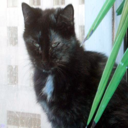

In [23]:
cv2_imshow(data[1])

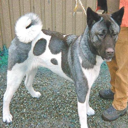

In [24]:
cv2_imshow(data[5590])

In [25]:
X = np.array(data)
y = np.array(label)

In [26]:
X.shape

(10000, 128, 128, 3)

In [27]:
y.shape

(10000,)

Doing train test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 2)

In [30]:
print(X_train.shape, X_test.shape)

(7500, 128, 128, 3) (2500, 128, 128, 3)


Slicing the data into smaller data as RAM keep crashing with more data

In [31]:
X_train[0]

array([[[215, 207, 191],
        [217, 210, 194],
        [219, 213, 197],
        ...,
        [247, 249, 246],
        [245, 247, 242],
        [242, 244, 239]],

       [[215, 207, 191],
        [217, 210, 194],
        [219, 213, 197],
        ...,
        [247, 249, 246],
        [246, 248, 243],
        [243, 245, 240]],

       [[215, 207, 191],
        [217, 210, 194],
        [218, 212, 197],
        ...,
        [247, 249, 246],
        [246, 248, 243],
        [242, 244, 239]],

       ...,

       [[228, 210, 184],
        [228, 211, 185],
        [229, 212, 186],
        ...,
        [219, 207, 183],
        [220, 208, 184],
        [219, 207, 184]],

       [[228, 211, 185],
        [229, 212, 186],
        [229, 212, 186],
        ...,
        [219, 207, 183],
        [220, 208, 184],
        [219, 207, 184]],

       [[229, 212, 186],
        [230, 213, 187],
        [230, 213, 187],
        ...,
        [221, 208, 182],
        [221, 208, 184],
        [221, 208, 184]]

Scaling the images by dividing with 255

In [32]:
X_train_scaled, X_test_scaled = X_train/255, X_test/255

In [33]:
X_train_scaled[0]

array([[[0.84313725, 0.81176471, 0.74901961],
        [0.85098039, 0.82352941, 0.76078431],
        [0.85882353, 0.83529412, 0.77254902],
        ...,
        [0.96862745, 0.97647059, 0.96470588],
        [0.96078431, 0.96862745, 0.94901961],
        [0.94901961, 0.95686275, 0.9372549 ]],

       [[0.84313725, 0.81176471, 0.74901961],
        [0.85098039, 0.82352941, 0.76078431],
        [0.85882353, 0.83529412, 0.77254902],
        ...,
        [0.96862745, 0.97647059, 0.96470588],
        [0.96470588, 0.97254902, 0.95294118],
        [0.95294118, 0.96078431, 0.94117647]],

       [[0.84313725, 0.81176471, 0.74901961],
        [0.85098039, 0.82352941, 0.76078431],
        [0.85490196, 0.83137255, 0.77254902],
        ...,
        [0.96862745, 0.97647059, 0.96470588],
        [0.96470588, 0.97254902, 0.95294118],
        [0.94901961, 0.95686275, 0.9372549 ]],

       ...,

       [[0.89411765, 0.82352941, 0.72156863],
        [0.89411765, 0.82745098, 0.7254902 ],
        [0.89803922, 0

In [34]:
from tensorflow.keras import layers, models

Making a CNN model

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                        

Fitting the data in the model with epochs = 30

In [37]:
model.fit(X_train_scaled, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
211/211 [==============================] - 18s 37ms/step - loss: 0.7673 - accuracy: 0.6290 - val_loss: 1.0490 - val_accuracy: 0.4867
Epoch 2/20
211/211 [==============================] - 6s 30ms/step - loss: 0.5548 - accuracy: 0.7166 - val_loss: 0.9145 - val_accuracy: 0.6000
Epoch 3/20
211/211 [==============================] - 6s 29ms/step - loss: 0.4621 - accuracy: 0.7819 - val_loss: 0.6909 - val_accuracy: 0.7053
Epoch 4/20
211/211 [==============================] - 6s 30ms/step - loss: 0.3943 - accuracy: 0.8166 - val_loss: 0.5304 - val_accuracy: 0.7640
Epoch 5/20
211/211 [==============================] - 6s 29ms/step - loss: 0.3273 - accuracy: 0.8553 - val_loss: 0.4733 - val_accuracy: 0.7920
Epoch 6/20
211/211 [==============================] - 6s 30ms/step - loss: 0.2600 - accuracy: 0.8907 - val_loss: 0.5272 - val_accuracy: 0.8107
Epoch 7/20
211/211 [==============================] - 6s 30ms/step - loss: 0.1768 - accuracy: 0.9299 - val_loss: 0.4145 - val_accuracy: 0.812

In [38]:
model.evaluate(X_test_scaled,y_test)

79/79 [==============================] - 1s 12ms/step - loss: 0.9134 - accuracy: 0.8308


[0.9134125113487244, 0.8307999968528748]

Exporting the model using pickle

In [49]:
import pickle
pickle.dump(model,open('dog_cat_score_model.pkl','wb'))

Testing the model with random images

In [39]:
import cv2

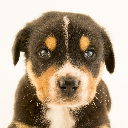

1/1 [==============================] - 0s 422ms/step
Score : 0.9999423
Dog


In [40]:
img_path = 'domestic-dog_thumb_square.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred[0]>0.5:
  print('Score :',pred[0][0])
  print('Dog')
else:
  print('Score :',1-pred[0][0])
  print('Cat')

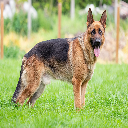

1/1 [==============================] - 0s 19ms/step
Score : 0.9999484
Dog


In [41]:
img_path = 'German-Shepherd-dog-Alsatian.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred[0]>0.5:
  print('Score :',pred[0][0])
  print('Dog')
else:
  print('Score :',1-pred[0][0])
  print('Cat')

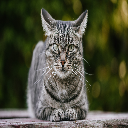

1/1 [==============================] - 0s 20ms/step
Score : 0.9999999999999357
Cat


In [42]:
img_path = 'cat.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred[0]>0.5:
  print('Score :',pred[0][0])
  print('Dog')
else:
  print('Score :',1-pred[0][0])
  print('Cat')

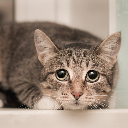

1/1 [==============================] - 0s 21ms/step
Score : 0.9999999999999968
Cat


In [43]:
img_path = 'Cat_s_Mind.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred[0]>0.5:
  print('Score :',pred[0][0])
  print('Dog')
else:
  print('Score :',1-pred[0][0])
  print('Cat')

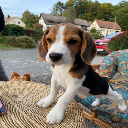

1/1 [==============================] - 0s 18ms/step
Score : 1.0
Dog


In [44]:
img_path = 'Ded.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred[0]>0.5:
  print('Score :',pred[0][0])
  print('Dog')
else:
  print('Score :',1-pred[0][0])
  print('Cat')

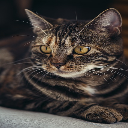

1/1 [==============================] - 0s 18ms/step
Score : 0.9999999971907751
Cat


In [45]:
img_path = 'Catety.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred[0]>0.5:
  print('Score :',pred[0][0])
  print('Dog')
else:
  print('Score :',1-pred[0][0])
  print('Cat')

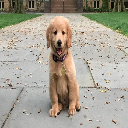

1/1 [==============================] - 0s 29ms/step
Score : 0.99097276
Dog


In [46]:
img_path = 'adub.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred[0]>0.5:
  print('Score :',pred[0][0])
  print('Dog')
else:
  print('Score :',1-pred[0][0])
  print('Cat')

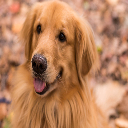

1/1 [==============================] - 0s 18ms/step
Score : 1.0
Dog


In [47]:
img_path = 'dogbreed.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred[0]>0.5:
  print('Score :',pred[0][0])
  print('Dog')
else:
  print('Score :',1-pred[0][0])
  print('Cat')

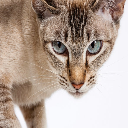

1/1 [==============================] - 0s 18ms/step
Score : 0.9999999999993662
Cat


In [48]:
img_path = 'Cattt.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred[0]>0.5:
  print('Score :',pred[0][0])
  print('Dog')
else:
  print('Score :',1-pred[0][0])
  print('Cat')